Kyle Riener<br>
MSIS 2629 Individual Project<br>
Deception first draft

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

# Firearm deaths by country

In [3]:
world=pd.read_csv("World firearms murders and ownership - Sheet 1.csv")

In [4]:
world.dropna(subset=['Homicide by firearm rate per 100,000 pop'],inplace=True)

In [5]:
ghetto=['Argentina','Bahamas','Brazil','Colombia','Costa Rica','El Salvador','Honduras','Jamaica',
          'Mexico','Philippines','Puerto Rico','South Africa','United States','Venezuela']

In [6]:
df=world[world['Country/Territory'].isin(ghetto)]

In [7]:
df=df.sort_values('Homicide by firearm rate per 100,000 pop',ascending=False)

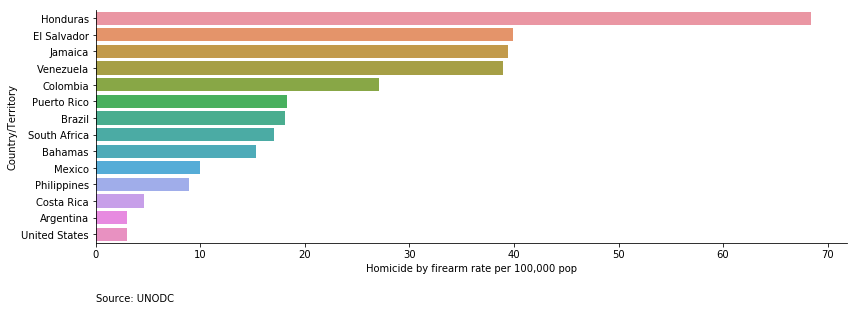

In [8]:
sns.factorplot(x='Homicide by firearm rate per 100,000 pop',y='Country/Territory',data=df,kind='bar',
             aspect=3)
plt.text(0, 17, u'Source: UNODC', fontsize=10)

Source: UNODC, Small Arms Survey via The Guardian via Vox
<br>
<br>

This chart shows the U.S. has a relatively low firearm homicide rate. I could also include more countries and see if the regression line has a negative slope.

# Redefine "Mass Shooting"

In [9]:
shootings= pd.read_csv("Mass Shootings.csv")

In [10]:
shootings.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"May 14, 2018",Maryland,Baltimore,2020 Etting Street,0,4,NaN
1,"May 13, 2018",Mississippi,Byhalia,French Rd and Berta Rd,0,4,NaN
2,"May 13, 2018",California,Stockton,2436 Belleview Street,3,2,NaN
3,"May 13, 2018",California,Los Angeles,365 W Manchester Avenue,2,2,NaN
4,"May 12, 2018",Nebraska,Omaha,3201 Decatur St,0,6,NaN


See Tableau chart (mass_shooting_US.png)<br>
I used Tableau to create a map that has markers at the locations of mass shootings. For this assignment, I defined a mass shooting as an event with more than 6 deaths. This brought the number of mass shootings down to 5. The only alteration to the data was using Tableau to create longitude and latitude. The map is not entirely necessary, but I wanted to create something similar to the Vox article. The idea is to create something that conveys how frequently shootings happen better than just stating a number.<br><br>

# Violent crime rate

In [11]:
crime_rate=pd.read_csv("Crime rate.csv")

In [12]:
ownership=pd.read_csv("Gun ownership.csv")

In [13]:
ownership.drop(ownership[ownership.State == 'Washington D.C.'].index, inplace=True)

In [14]:
merged=crime_rate.merge(ownership, on='State')

In [15]:
merged.head()

,Rank_x,State,"Violent Crime Rate Per 100,000 Inhabitants",Rank_y,# of guns per capita,# of guns registered
0,1,Alaska,804,15,21.38,"15,824"
1,2,New Mexico,703,4,46.73,"97,580"
2,3,Nevada,678,9,25.64,"76,888"
3,4,Tennessee,633,33,14.76,"99,159"
4,5,Louisiana,566,11,24.94,"116,831"


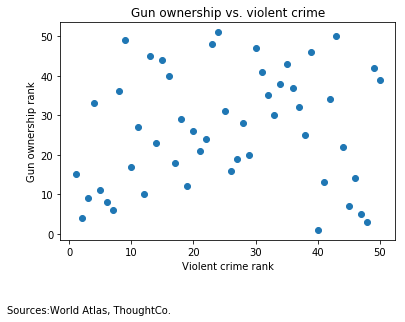

In [16]:
scatter(merged['Rank_x'],merged["Rank_y"])
plt.title("Gun ownership vs. violent crime")
plt.xlabel("Violent crime rank")
plt.ylabel("Gun ownership rank")
plt.text(-10, -20, u'Sources:World Atlas, ThoughtCo.', fontsize=10)

In [17]:
top5=list(ownership['State'].head())
top5

['Wyoming', 'New Hampshire', 'New Mexico', 'Virginia', 'Alabama']

In [18]:
bottom5=list(ownership['State'].tail())

In [19]:
t5=crime_rate[crime_rate['State'].isin(top5)]

In [20]:
b5=crime_rate[crime_rate['State'].isin(bottom5)]

In [21]:
top5avg=t5['Violent Crime Rate Per 100,000 Inhabitants'].mean()

In [22]:
bottom5avg=b5['Violent Crime Rate Per 100,000 Inhabitants'].mean()

In [23]:
df=pd.DataFrame({'Ownership level' : ['High Ownership','Low Ownership'],
                 'Violent Crime Rate' : [top5avg,bottom5avg]})

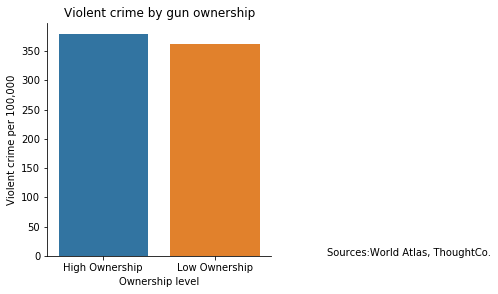

In [24]:
sns.factorplot(x='Ownership level',y='Violent Crime Rate',data=df,kind='bar')
plt.title("Violent crime by gun ownership")
plt.xlabel("Ownership level")
plt.ylabel("Violent crime per 100,000")
plt.text(2, 0, u'Sources:World Atlas, ThoughtCo.', fontsize=10)

There is no strong correlation between gun ownership and violent crime. States with a high rate of gun ownership have nearly the same rate of violent crimes as states with a low rate of gun ownership and the scatterplot shows no obvious trend.

Sources: World Atlas (https://www.worldatlas.com/articles/the-most-dangerous-states-in-the-u-s.html)<br>
ThoughtCo. (https://www.thoughtco.com/gun-owners-percentage-of-state-populations-3325153)

The inspiration for this section came from looking at police death rates, so I could also use that in my comparison.